<h1>QUESTION 1</h1>

# <h2>NAME : OWUSU - ANSAH BENJAMIN</h2>
<h2>PROGRAMME: BSC. METEOROLOGY AND CLIMATE SCIENCE</h2>
<h2>COURSE: ATMOSPHERIC FIELD SCIENCE</h2>
<h2>INDEX NUMBER: 4295020</h2>
<h2>REFERENCE NUMBER: 20728049</h2>

In [1]:
#IMPORTING THE NECESSARY LIBRARIES
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#MERGING THE MEXICO DATASETS
xr.open_mfdataset('C:\\Users\\ansah\\Downloads\\Documents\\FIELD WORK (MEXICO)\\*.nc')

<xarray.Dataset>
Dimensions:   (lon: 129, lat: 74, datetime: 5114)
Coordinates:
  * lon       (lon) float32 -118.5 -118.2 -118.0 -117.8 ... -87.0 -86.75 -86.5
  * lat       (lat) float32 33.0 32.75 32.5 32.25 32.0 ... 15.5 15.25 15.0 14.75
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2015-01-01
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 74, 129), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [3]:
#READING THE DATASETS
mexico = xr.open_mfdataset('C:\\Users\\ansah\\Downloads\\Documents\\FIELD WORK (MEXICO)\\*.nc')
mexico=mexico.where(mexico !=-99.0)
mexico

<xarray.Dataset>
Dimensions:   (datetime: 5114, lat: 74, lon: 129)
Coordinates:
  * lon       (lon) float32 -118.5 -118.2 -118.0 -117.8 ... -87.0 -86.75 -86.5
  * lat       (lat) float32 33.0 32.75 32.5 32.25 32.0 ... 15.5 15.25 15.0 14.75
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2015-01-01
Data variables:
    crs       (datetime) float64 -2.147e+09 -2.147e+09 ... -2.147e+09 -2.147e+09
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 74, 129), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [4]:
#SLICING THE YEAR 
mexico_data = mexico.sel(datetime=slice("2002","2011"),lon=(-102.5),lat=(23.5))
mexico_data

<xarray.Dataset>
Dimensions:   (datetime: 3652)
Coordinates:
    lon       float32 -102.5
    lat       float32 23.5
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
Data variables:
    crs       (datetime) float64 -2.147e+09 -2.147e+09 ... -2.147e+09 -2.147e+09
    precip    (datetime) float32 dask.array<chunksize=(365,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [5]:
mexico_precip = mexico_data['precip']
mexico_precip

<xarray.DataArray 'precip' (datetime: 3652)>
dask.array<getitem, shape=(3652,), dtype=float32, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
    lon       float32 -102.5
    lat       float32 23.5
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
Attributes:
    grid_mapping:  crs

In [6]:
#MONTHLY RAINFALL TOTALS OF MEXICO
monthly_rainfall_totals = mexico_precip.resample(datetime='1M').sum()
monthly_rainfall_totals

<xarray.DataArray 'precip' (datetime: 120)>
dask.array<stack, shape=(120,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-01-31 2002-02-28 ... 2011-12-31
    lon       float32 -102.5
    lat       float32 23.5

In [7]:
#MONTHLY CLIMATOLOGY OF MEXICO
mexico_climatologies = monthly_rainfall_totals.groupby('datetime.month').mean('datetime')
mexico_climatologies

<xarray.DataArray 'precip' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 -102.5
    lat      float32 23.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

<h1>QUESTION 2 </h1>

In [8]:
# COMPUTING ANNUAL TOTALS
annual_totals = mexico_precip.resample(datetime='1Y').sum()
annual_totals

<xarray.DataArray 'precip' (datetime: 10)>
dask.array<stack, shape=(10,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-12-31 2003-12-31 ... 2011-12-31
    lon       float32 -102.5
    lat       float32 23.5

In [9]:
# COMPUTING THE ANNUAL AVERAGES
annual_average = annual_totals.groupby('datetime.month').mean('datetime')
annual_average

<xarray.DataArray 'precip' (month: 1)>
dask.array<stack, shape=(1,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 -102.5
    lat      float32 23.5
  * month    (month) int64 12

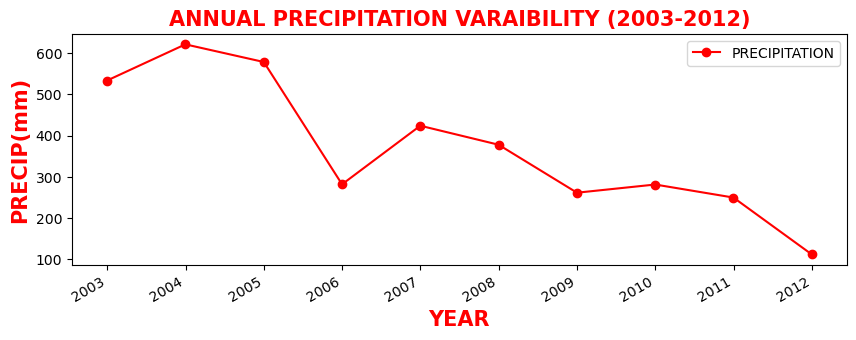

In [10]:
#Time series on the year to year trends and changes.
annual_totals = mexico_precip.resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
annual_totals.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='PRECIPITATION')
ax.set_title('ANNUAL PRECIPITATION VARAIBILITY (2003-2012)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

<h1>QUESTION 3</h1>

In [11]:
mexi_co= xr.open_mfdataset('C:\\Users\\ansah\\Downloads\\Documents\\FIELD WORK (MEXICO)\\*.nc')
mexi_co

<xarray.Dataset>
Dimensions:   (lon: 129, lat: 74, datetime: 5114)
Coordinates:
  * lon       (lon) float32 -118.5 -118.2 -118.0 -117.8 ... -87.0 -86.75 -86.5
  * lat       (lat) float32 33.0 32.75 32.5 32.25 32.0 ... 15.5 15.25 15.0 14.75
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2015-01-01
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 74, 129), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [12]:
mexico_precip1 = mexi_co['precip']
mexico_precip1

<xarray.DataArray 'precip' (datetime: 5114, lat: 74, lon: 129)>
dask.array<concatenate, shape=(5114, 74, 129), dtype=float32, chunksize=(366, 74, 129), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 -118.5 -118.2 -118.0 -117.8 ... -87.0 -86.75 -86.5
  * lat       (lat) float32 33.0 32.75 32.5 32.25 32.0 ... 15.5 15.25 15.0 14.75
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2015-01-01
Attributes:
    grid_mapping:  crs

In [13]:
mexi = mexico_precip1
annual_dry_days = (mexi < 1).groupby('datetime.year').sum(dim='datetime')
annual_dry_days

<xarray.DataArray 'precip' (year: 15, lat: 74, lon: 129)>
dask.array<stack, shape=(15, 74, 129), dtype=int32, chunksize=(1, 74, 129), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -118.5 -118.2 -118.0 -117.8 ... -87.0 -86.75 -86.5
  * lat      (lat) float32 33.0 32.75 32.5 32.25 32.0 ... 15.5 15.25 15.0 14.75
  * year     (year) int64 2001 2002 2003 2004 2005 ... 2011 2012 2013 2014 2015

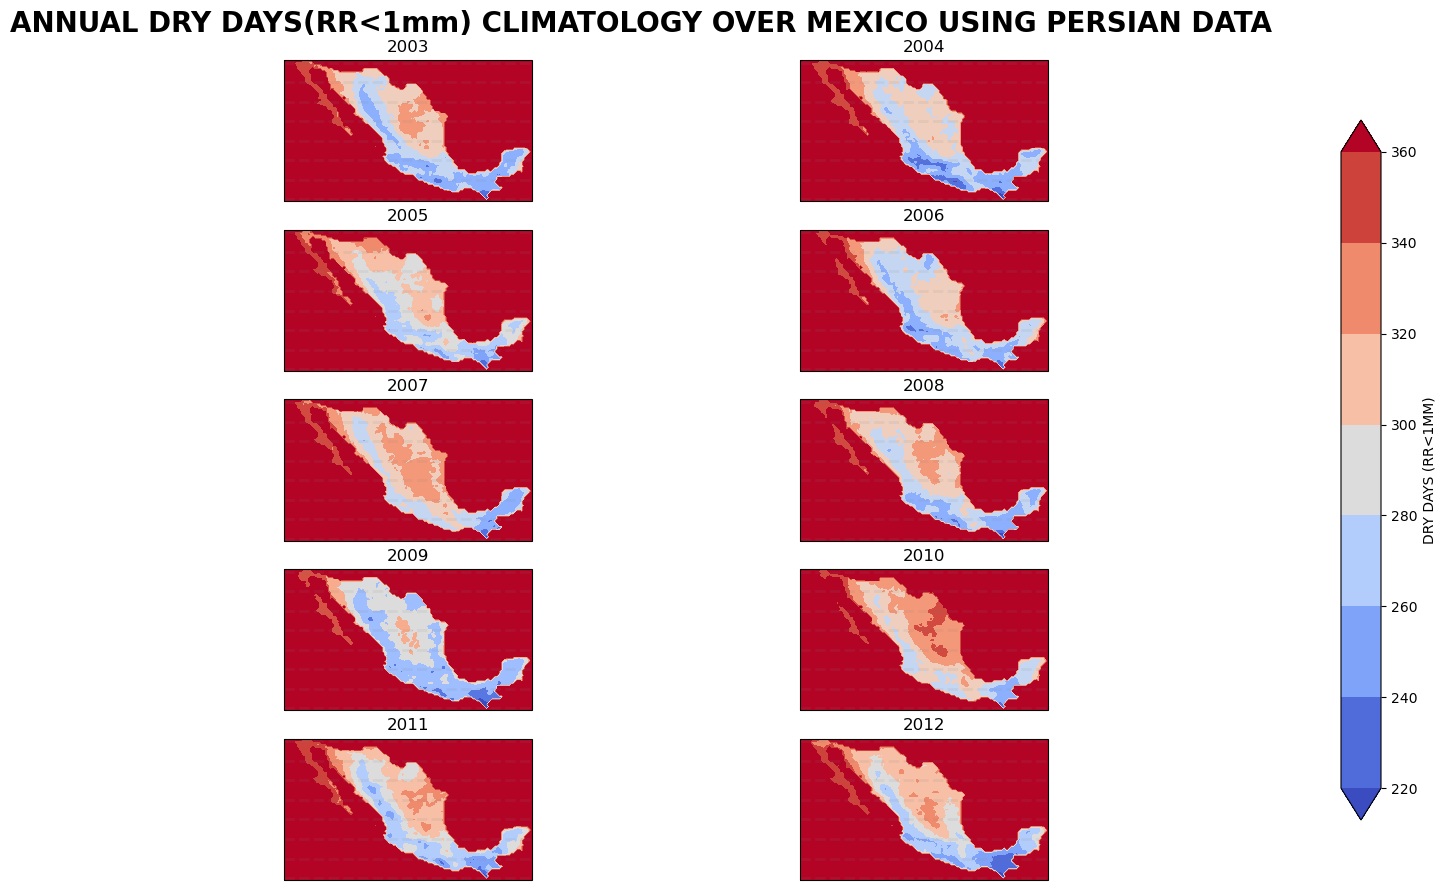

In [14]:
                 #SPATIAL PLOTS FOR ANNUAL DRY DAYS(RR<1MM)
fig, axes = plt.subplots(nrows=5, 
                       ncols=2, 
                       figsize=(20, 10),
                       subplot_kw={'projection':ccrs.PlateCarree()})
ax = axes.flatten()
years = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']
for i, v in enumerate(ax):
    ax[i].add_feature(cfeature.LAKES)
    ax[i].set_extent((-118.5,-86.7,32.0,14.75))
    ax[i].set_title(years[i])
    cs=ax[i].contourf(annual_dry_days['lon'],
                   annual_dry_days['lat'], 
                   annual_dry_days[i],
                   transform=ccrs.PlateCarree(),
                   cmap='coolwarm',extend='both')
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=2, color='gray', alpha=0.1, linestyle='--')
    gl.xlocator = mticker.FixedLocator(np.arange(-3.5, 1.4))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.xlabel_style = {'color': 'black'}
fig.subplots_adjust(wspace=-0.5, top=0.93)
cbar_ax = fig.add_axes([0.85, 0.17, 0.02, 0.7])
fig.suptitle("ANNUAL DRY DAYS(RR<1mm) CLIMATOLOGY OVER MEXICO USING PERSIAN DATA", fontweight='bold', fontsize=20);
cbar=fig.colorbar(cs, cax=cbar_ax, orientation='vertical' ,label='DRY DAYS (RR<1MM)')

In [15]:
mex_i = mexico_precip1
annual_wet_days = (mex_i >= 1).groupby('datetime.year').sum(dim='datetime')
annual_wet_days

<xarray.DataArray 'precip' (year: 15, lat: 74, lon: 129)>
dask.array<stack, shape=(15, 74, 129), dtype=int32, chunksize=(1, 74, 129), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -118.5 -118.2 -118.0 -117.8 ... -87.0 -86.75 -86.5
  * lat      (lat) float32 33.0 32.75 32.5 32.25 32.0 ... 15.5 15.25 15.0 14.75
  * year     (year) int64 2001 2002 2003 2004 2005 ... 2011 2012 2013 2014 2015

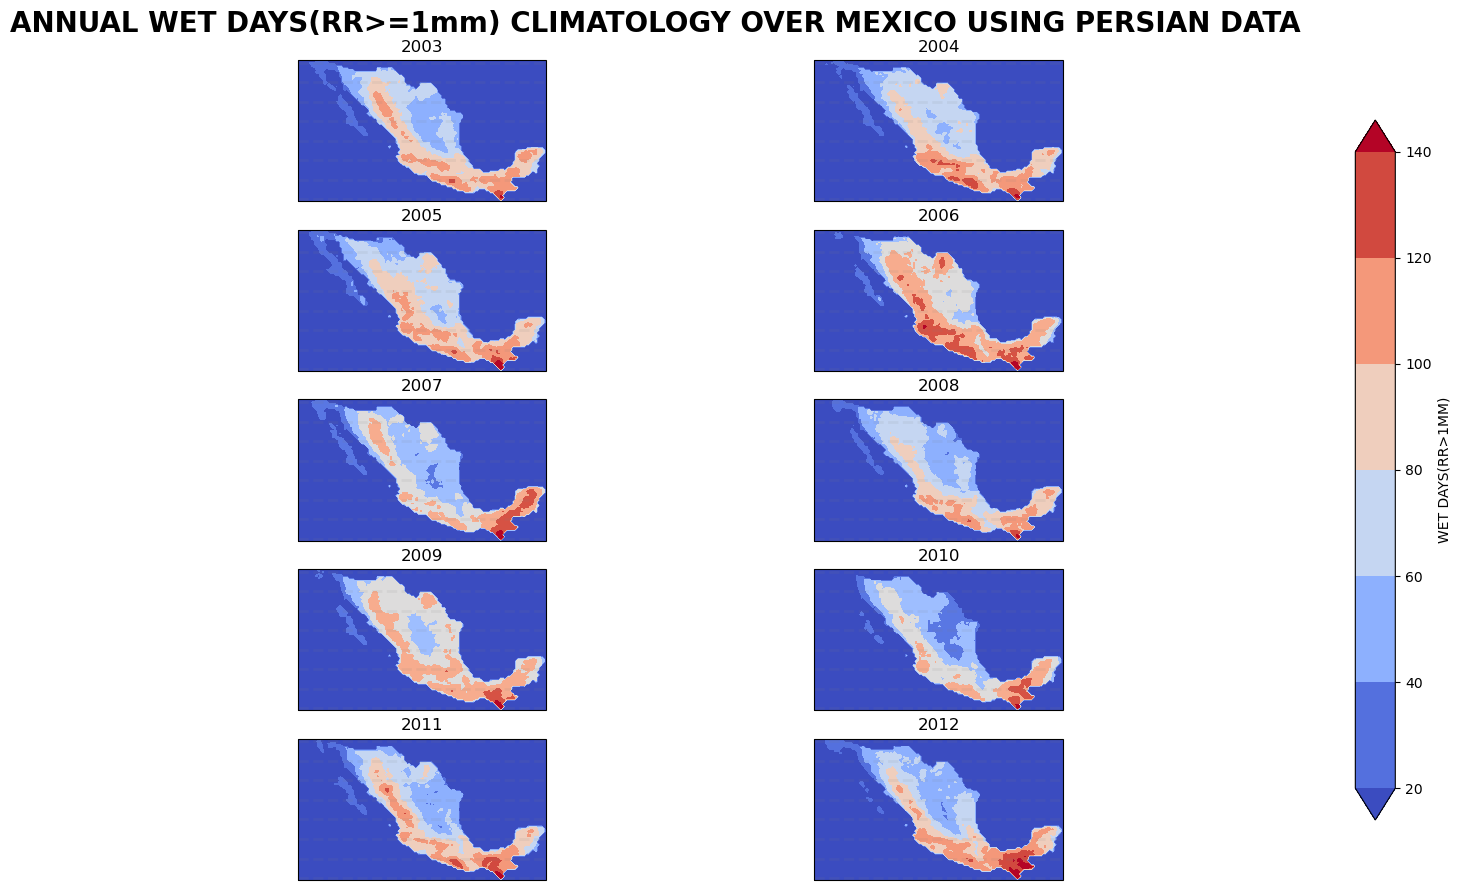

In [16]:
                #SPATIAL PLOTS FOR ANNUAL WET DAYS(RR>=1MM)
fig, axes = plt.subplots(nrows=5, 
                       ncols=2, 
                       figsize=(20, 10),
                       subplot_kw={'projection':ccrs.PlateCarree()})
ax = axes.flatten()

years = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']

for i, v in enumerate(ax):
    ax[i].add_feature(cfeature.LAKES)
    ax[i].set_extent((-118.5,-86.7,32.0,14.75))
    ax[i].set_title(years[i])
    cs=ax[i].contourf(annual_wet_days['lon'],
                   annual_wet_days['lat'], 
                   annual_wet_days[i],
                   transform=ccrs.PlateCarree(),
                   cmap='coolwarm',extend='both')
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=2, color='gray', alpha=0.1, linestyle='--')
    gl.xlocator = mticker.FixedLocator(np.arange(-3.5, 1.4))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.xlabel_style = {'color': 'black'}
fig.subplots_adjust(wspace=-0.5, top=0.93)
cbar_ax = fig.add_axes([0.85, 0.17, 0.02, 0.7])
fig.suptitle("ANNUAL WET DAYS(RR>=1mm) CLIMATOLOGY OVER MEXICO USING PERSIAN DATA", fontweight='bold', fontsize=20);
cbar=fig.colorbar(cs, cax=cbar_ax, orientation='vertical' ,label='WET DAYS(RR>1MM)')

In [17]:
mexi = mexico_precip1
monthly_dry_days = (mexi < 1).groupby('datetime.month').sum(dim='datetime')
monthly_dry_days

<xarray.DataArray 'precip' (month: 12, lat: 74, lon: 129)>
dask.array<stack, shape=(12, 74, 129), dtype=int32, chunksize=(1, 74, 129), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -118.5 -118.2 -118.0 -117.8 ... -87.0 -86.75 -86.5
  * lat      (lat) float32 33.0 32.75 32.5 32.25 32.0 ... 15.5 15.25 15.0 14.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

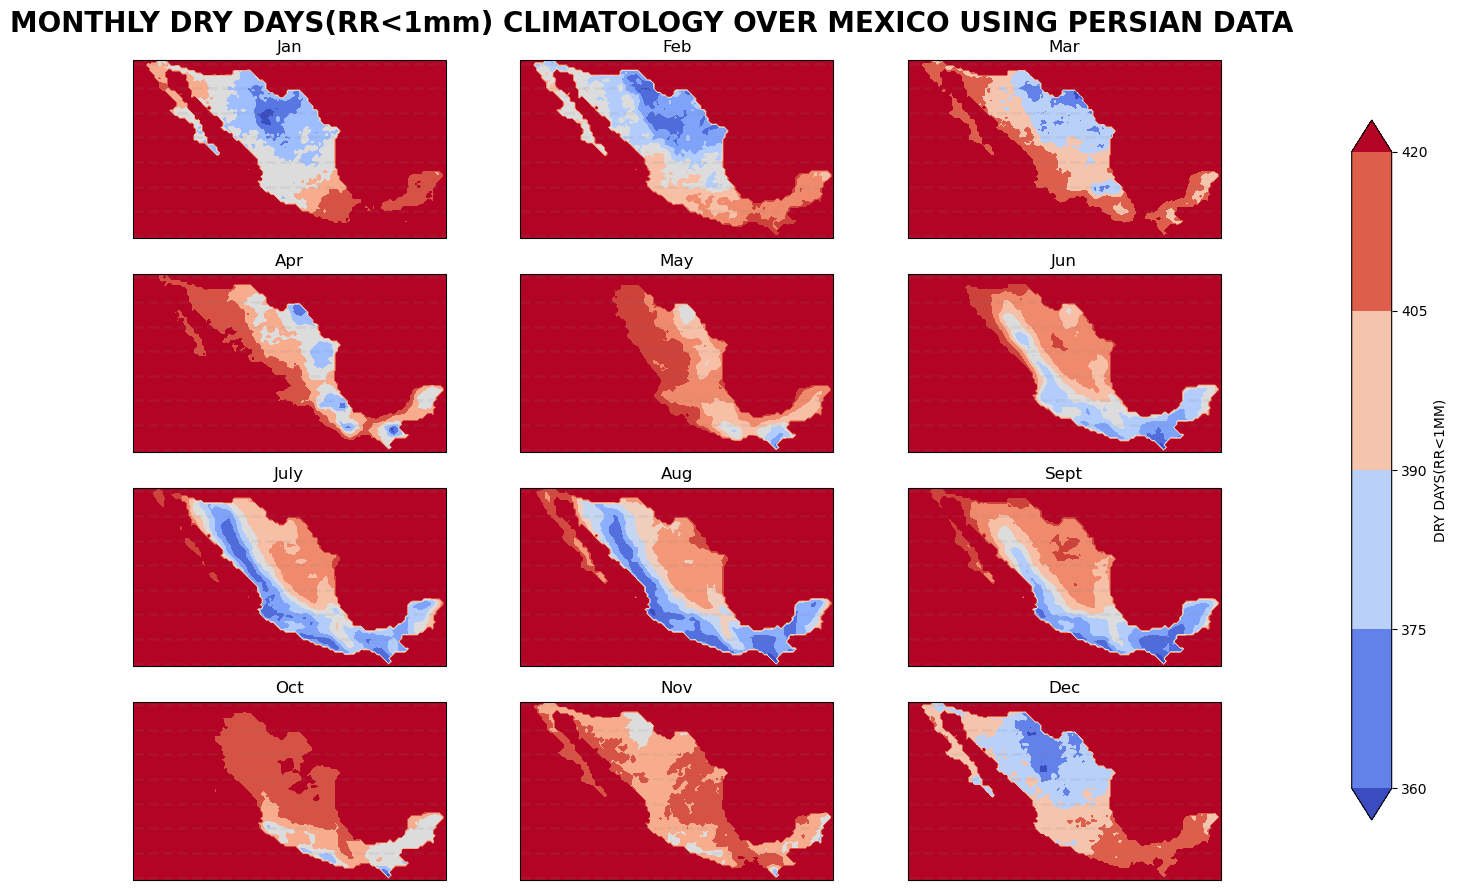

In [18]:
            #SPATIAL PLOTS FOR MONTHLY DRY  DAYS(RR<1MM)
fig, axes = plt.subplots(nrows=4, 
                       ncols=3, 
                       figsize=(20, 10),
                       subplot_kw={'projection':ccrs.PlateCarree()})
ax = axes.flatten()

month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']

for i, v in enumerate(ax):
    ax[i].add_feature(cfeature.LAKES)
    ax[i].set_extent((-118.5,-86.7,32.0,14.75))
    ax[i].set_title(month_names[i])
    cs=ax[i].contourf(monthly_dry_days['lon'],
                   monthly_dry_days['lat'], 
                   monthly_dry_days[i],
                   transform=ccrs.PlateCarree(),
                   cmap='coolwarm',extend='both')
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=2, color='gray', alpha=0.1, linestyle='--')
    gl.xlocator = mticker.FixedLocator(np.arange(-3.5, 1.4))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.xlabel_style = {'color': 'black'}
fig.subplots_adjust(wspace=-0.5, top=0.93)
cbar_ax = fig.add_axes([0.85, 0.17, 0.02, 0.7])
fig.suptitle("MONTHLY DRY DAYS(RR<1mm) CLIMATOLOGY OVER MEXICO USING PERSIAN DATA", fontweight='bold', fontsize=20);
cbar=fig.colorbar(cs, cax=cbar_ax, orientation='vertical' ,label='DRY DAYS(RR<1MM)')

In [19]:
mexi = mexico_precip1
monthly_wet_days = (mexi >= 1).groupby('datetime.month').sum(dim='datetime')
monthly_wet_days

<xarray.DataArray 'precip' (month: 12, lat: 74, lon: 129)>
dask.array<stack, shape=(12, 74, 129), dtype=int32, chunksize=(1, 74, 129), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -118.5 -118.2 -118.0 -117.8 ... -87.0 -86.75 -86.5
  * lat      (lat) float32 33.0 32.75 32.5 32.25 32.0 ... 15.5 15.25 15.0 14.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

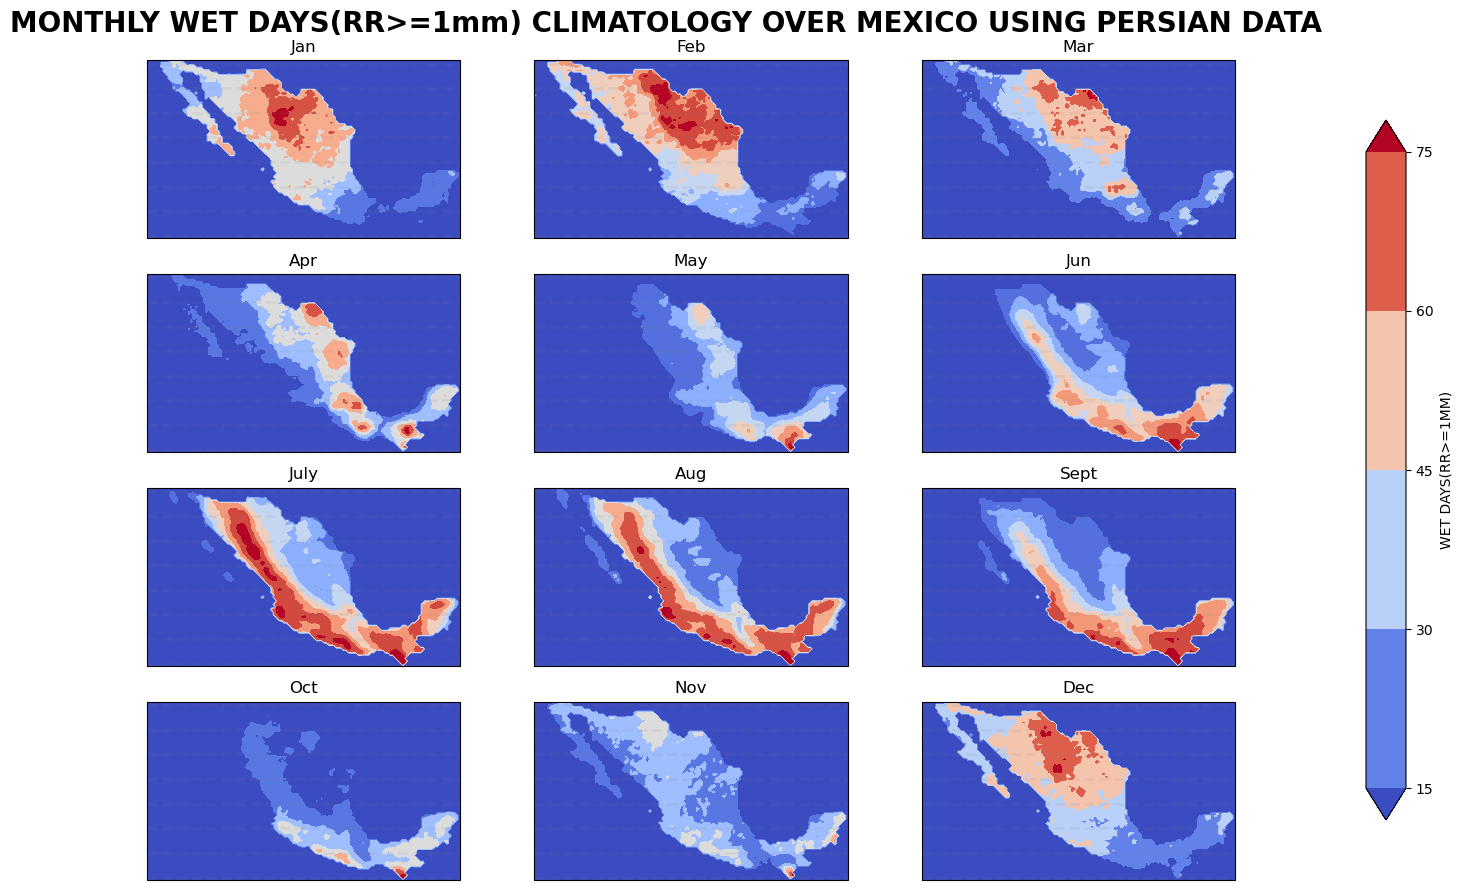

In [20]:
           #SPATIAL PLOTS FOR MONTHLY WET  DAYS(RR>=1MM)
fig, axes = plt.subplots(nrows=4, 
                       ncols=3, 
                       figsize=(20, 10),
                       subplot_kw={'projection':ccrs.PlateCarree()})
ax = axes.flatten()

month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']

for i, v in enumerate(ax):
    ax[i].add_feature(cfeature.LAKES)
    ax[i].set_extent((-118.5,-86.7,32.0,14.75))
    ax[i].set_title(month_names[i])
    cs=ax[i].contourf(monthly_wet_days['lon'],
                   monthly_wet_days['lat'], 
                   monthly_wet_days[i],
                   transform=ccrs.PlateCarree(),
                   cmap='coolwarm',extend='both')
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=2, color='gray', alpha=0.1, linestyle='--')
    gl.xlocator = mticker.FixedLocator(np.arange(-3.5, 1.4))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.xlabel_style = {'color': 'black'}
fig.subplots_adjust(wspace=-0.5, top=0.93)
cbar_ax = fig.add_axes([0.85, 0.17, 0.02, 0.7])
fig.suptitle("MONTHLY WET DAYS(RR>=1mm) CLIMATOLOGY OVER MEXICO USING PERSIAN DATA", fontweight='bold', fontsize=20);
cbar=fig.colorbar(cs, cax=cbar_ax, orientation='vertical' ,label='WET DAYS(RR>=1MM)')

In [21]:
#NUMBER OF DRY DAYS(RR<1mm) AND WET DAYS (RR>=1mm) PER MONTH
wet_days = mexico_precip.where(mexico_precip >= 1)
dry_days = mexico_precip.where(mexico_precip < 1)

wet_days_per_month = wet_days.groupby('datetime.month').sum(dim='datetime')
dry_days_per_month = dry_days.groupby('datetime.month').sum(dim='datetime')

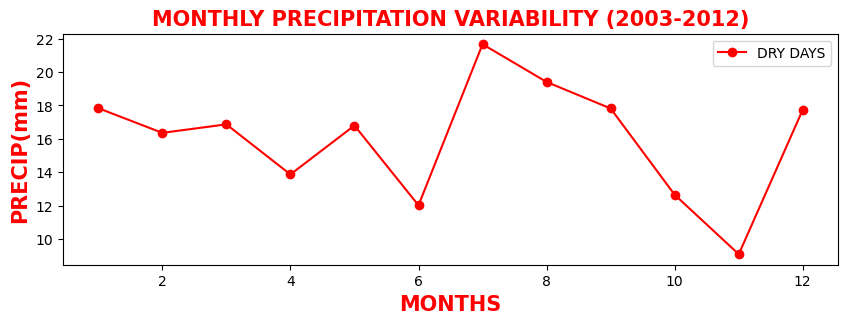

In [22]:
      #TIMESERIES FOR DRY DAYS(RR<1mm) PER MONTH
dry_days_per_month = dry_days.groupby('datetime.month').sum(dim='datetime')
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
dry_days_per_month.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='DRY DAYS')
ax.set_title('MONTHLY PRECIPITATION VARIABILITY (2003-2012)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('MONTHS', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

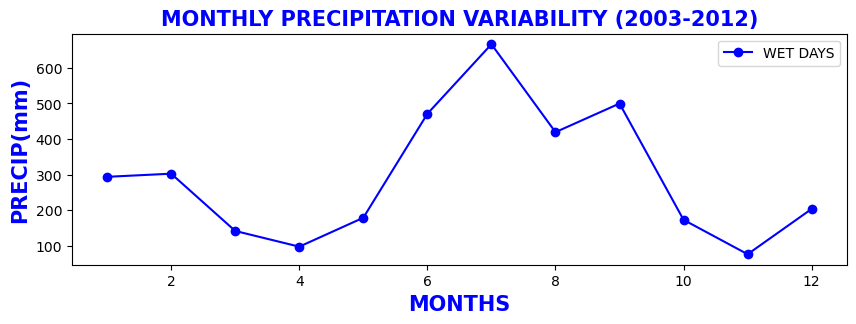

In [23]:
      #TIMESERIES FOR WET DAYS(RR>1mm) PER MONTH
wet_days_per_month = wet_days.groupby('datetime.month').sum(dim='datetime')
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_per_month.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='WET DAYS')
ax.set_title('MONTHLY PRECIPITATION VARIABILITY (2003-2012)',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('MONTHS', fontweight = 'bold', fontsize = 15,color = 'blue')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'blue')
plt.legend()
plt.show()

In [24]:
#NUMBER OF DRY DAYS(RR<1mm) AND WET DAYS (RR>1mm) PER YEAR
dry_days_annual = (mexico_data['precip']< 1).resample(datetime='1Y').sum()
wet_days_annual = (mexico_data['precip']>=1).resample(datetime='1Y').sum()

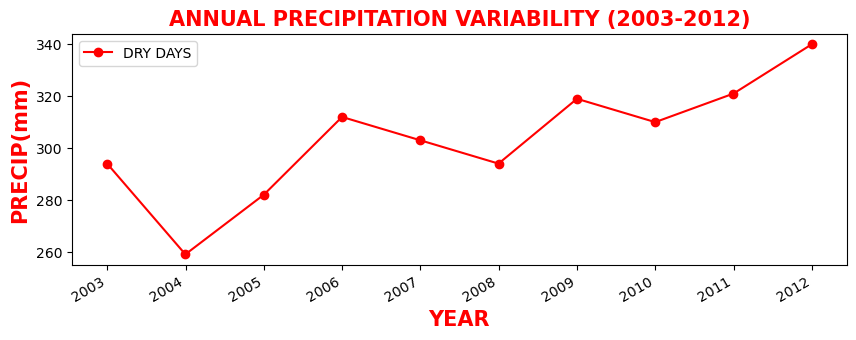

In [25]:
       #TIMESERIES FOR DRY DAYS(RR<1mm) PER YEAR
dry_days_annual = (mexico_data['precip']< 1).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
dry_days_annual.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='DRY DAYS')
ax.set_title('ANNUAL PRECIPITATION VARIABILITY (2003-2012)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

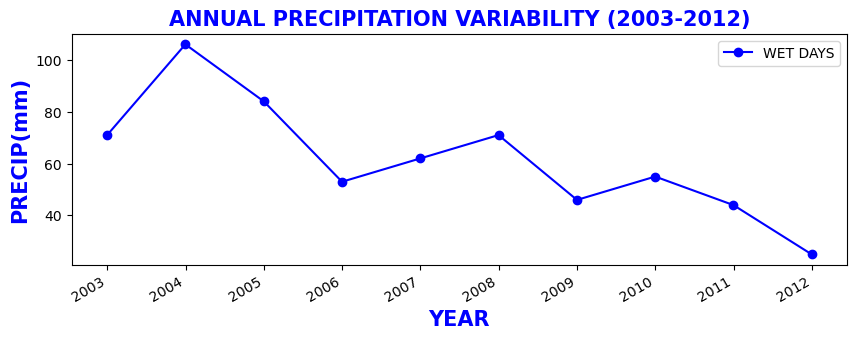

In [26]:
       #TIMESERIES FOR WET DAYS(RR>=1mm) PER YEAR
wet_days_annual = (mexico_data['precip']>=1).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_annual.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='WET DAYS')
ax.set_title('ANNUAL PRECIPITATION VARIABILITY (2003-2012)',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'blue')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'blue')
plt.legend()
plt.show()

<h1>QUESTION 4 </h1>

In [27]:
extremme_10mm = mexico_precip1
extremme_10mm_annual_dry_days = (extremme_10mm > 10).groupby('datetime.year').sum(dim='datetime')
extremme_10mm_annual_dry_days

<xarray.DataArray 'precip' (year: 15, lat: 74, lon: 129)>
dask.array<stack, shape=(15, 74, 129), dtype=int32, chunksize=(1, 74, 129), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -118.5 -118.2 -118.0 -117.8 ... -87.0 -86.75 -86.5
  * lat      (lat) float32 33.0 32.75 32.5 32.25 32.0 ... 15.5 15.25 15.0 14.75
  * year     (year) int64 2001 2002 2003 2004 2005 ... 2011 2012 2013 2014 2015

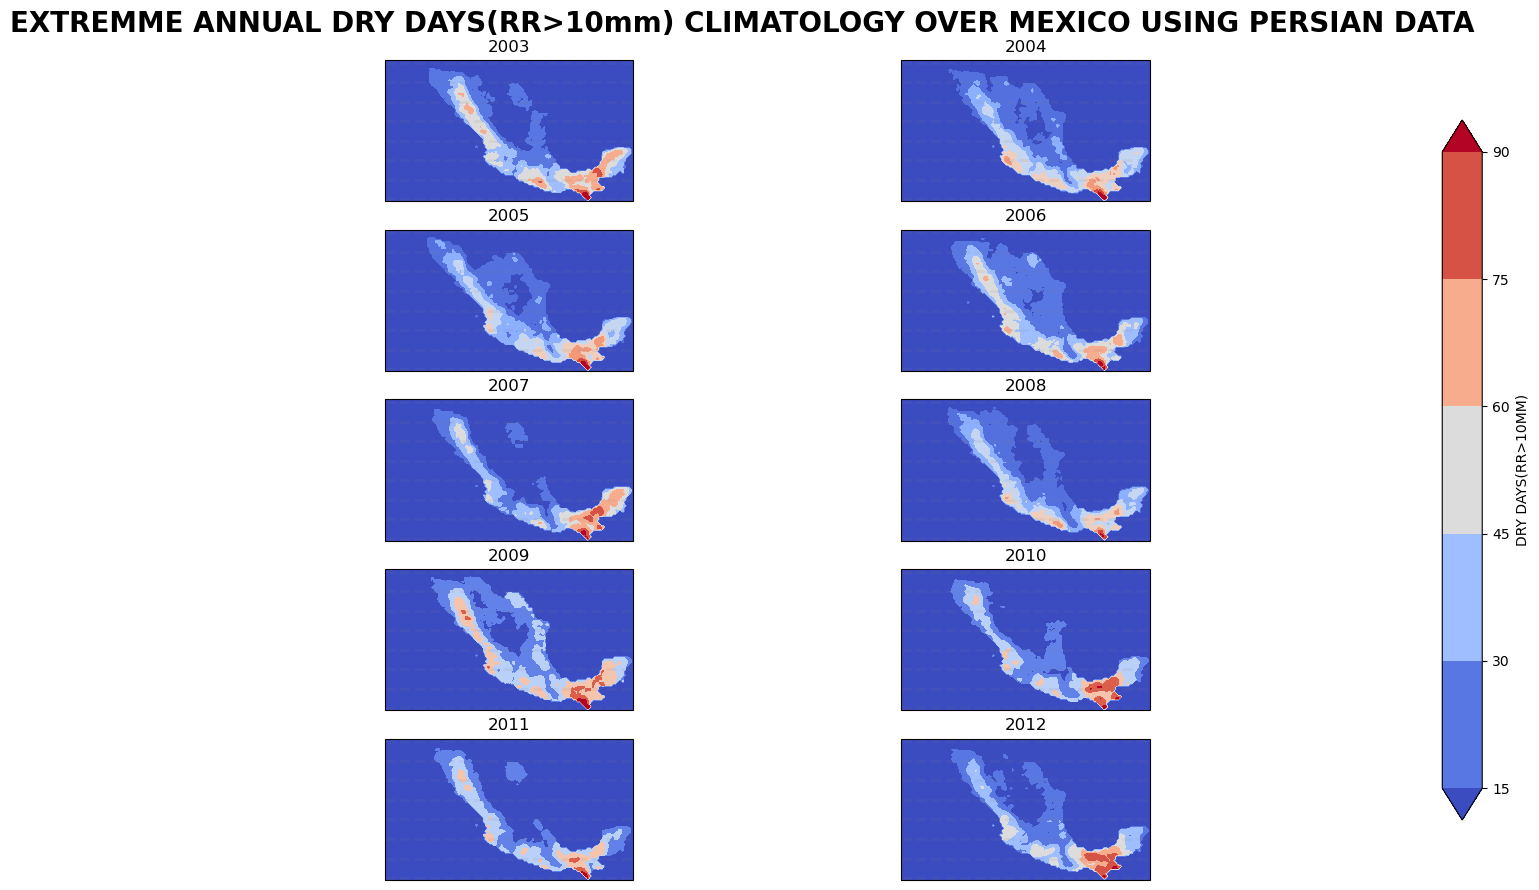

In [28]:
               #SPATIAL PLOTS FOR  EXTREMME(R>10mm) ANNUAL DRY DAYS
fig, axes = plt.subplots(nrows=5, 
                       ncols=2, 
                       figsize=(20, 10),
                       subplot_kw={'projection':ccrs.PlateCarree()})
ax = axes.flatten()

years = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']

for i, v in enumerate(ax):
    ax[i].add_feature(cfeature.LAKES)
    ax[i].set_extent((-118.5,-86.7,32.0,14.75))
    ax[i].set_title(years[i])
    cs=ax[i].contourf(extremme_10mm_annual_dry_days['lon'],
                   extremme_10mm_annual_dry_days['lat'], 
                   extremme_10mm_annual_dry_days[i],
                   transform=ccrs.PlateCarree(),
                   cmap='coolwarm',extend='both')
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=2, color='gray', alpha=0.1, linestyle='--')
    gl.xlocator = mticker.FixedLocator(np.arange(-3.5, 1.4))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.xlabel_style = {'color': 'black'}
fig.subplots_adjust(wspace=-0.5, top=0.93)
cbar_ax = fig.add_axes([0.85, 0.17, 0.02, 0.7])
fig.suptitle("EXTREMME ANNUAL DRY DAYS(RR>10mm) CLIMATOLOGY OVER MEXICO USING PERSIAN DATA", fontweight='bold', fontsize=20);
cbar=fig.colorbar(cs, cax=cbar_ax, orientation='vertical' ,label='DRY DAYS(RR>10MM)')

In [29]:
extremme_20mm = mexico_precip1
extremme_20mm_annual_wet_days = (extremme_20mm > 20).groupby('datetime.year').sum(dim='datetime')
extremme_20mm_annual_wet_days

<xarray.DataArray 'precip' (year: 15, lat: 74, lon: 129)>
dask.array<stack, shape=(15, 74, 129), dtype=int32, chunksize=(1, 74, 129), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -118.5 -118.2 -118.0 -117.8 ... -87.0 -86.75 -86.5
  * lat      (lat) float32 33.0 32.75 32.5 32.25 32.0 ... 15.5 15.25 15.0 14.75
  * year     (year) int64 2001 2002 2003 2004 2005 ... 2011 2012 2013 2014 2015

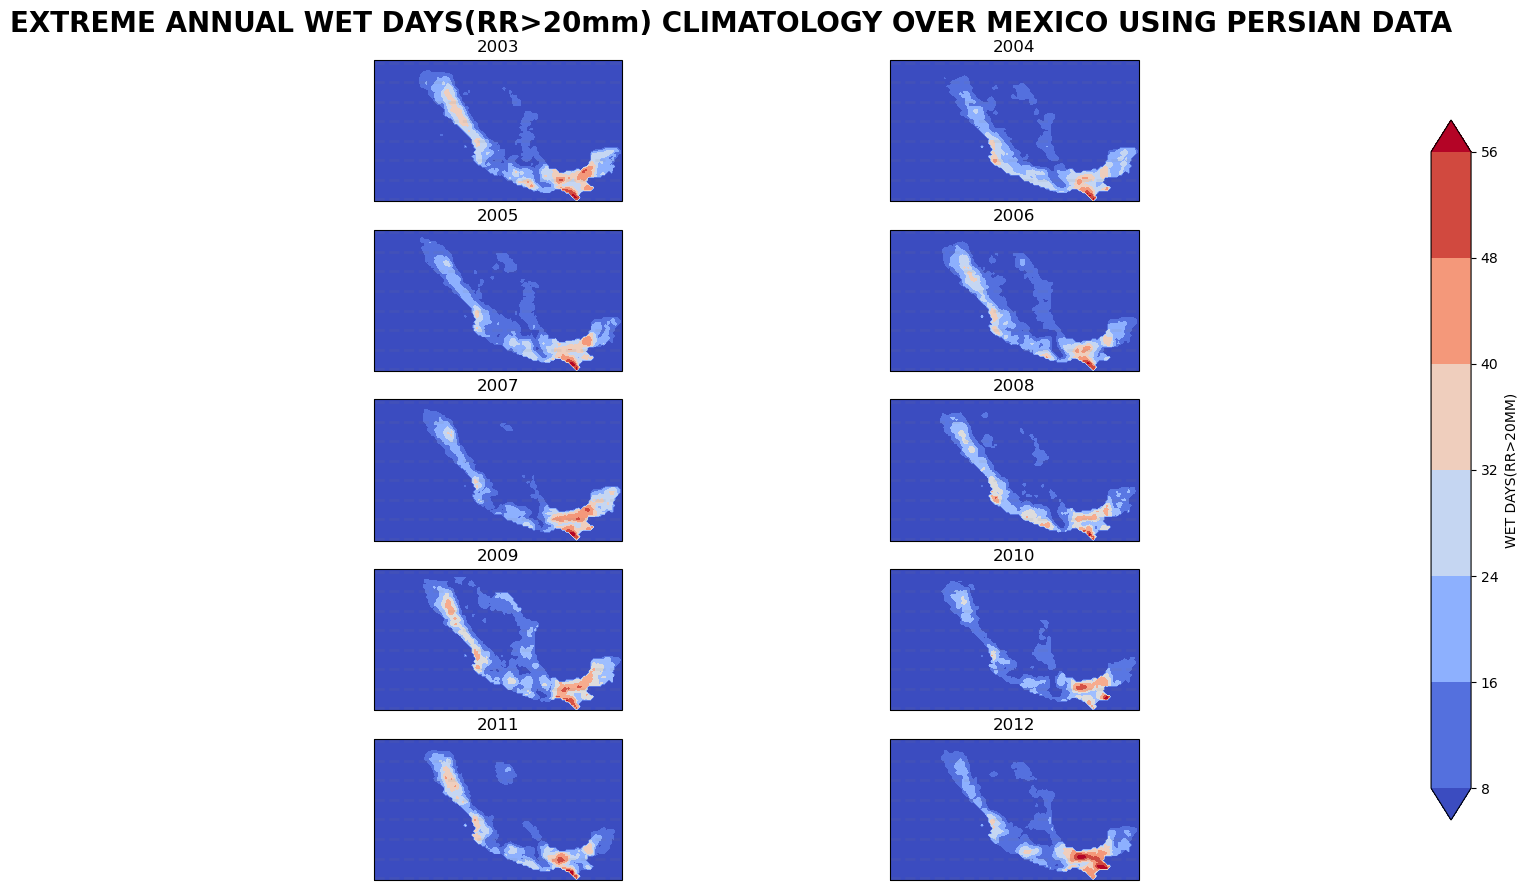

In [41]:
               #SPATIAL PLOTS FOR  EXTREMME(R>20mm) ANNUAL WET DAYS
fig, axes = plt.subplots(nrows=5, 
                       ncols=2, 
                       figsize=(20, 10),
                       subplot_kw={'projection':ccrs.PlateCarree()})
ax = axes.flatten()

years = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']

for i, v in enumerate(ax):
    ax[i].add_feature(cfeature.LAKES)
    ax[i].set_extent((-118.5,-86.7,32.0,14.75))
    ax[i].set_title(years[i])
    cs=ax[i].contourf(extremme_20mm_annual_wet_days['lon'],
                   extremme_20mm_annual_wet_days['lat'], 
                   extremme_20mm_annual_wet_days[i],
                   transform=ccrs.PlateCarree(),
                   cmap='coolwarm',extend='both')
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=2, color='gray', alpha=0.1, linestyle='--')
    gl.xlocator = mticker.FixedLocator(np.arange(-3.5, 1.4))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.xlabel_style = {'color': 'black'}
fig.subplots_adjust(wspace=-0.5, top=0.93)
cbar_ax = fig.add_axes([0.85, 0.17, 0.02, 0.7])
fig.suptitle("EXTREME ANNUAL WET DAYS(RR>20mm) CLIMATOLOGY OVER MEXICO USING PERSIAN DATA", fontweight='bold', fontsize=20);
cbar=fig.colorbar(cs, cax=cbar_ax, orientation='vertical' ,label='WET DAYS(RR>20MM)')

In [42]:
extremme_10mm_mexi = mexico_precip1
extremme_10mm_monthly_dry_days = (extremme_10mm_mexi > 10).groupby('datetime.month').sum(dim='datetime')
extremme_10mm_monthly_dry_days

<xarray.DataArray 'precip' (month: 12, lat: 74, lon: 129)>
dask.array<stack, shape=(12, 74, 129), dtype=int32, chunksize=(1, 74, 129), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -118.5 -118.2 -118.0 -117.8 ... -87.0 -86.75 -86.5
  * lat      (lat) float32 33.0 32.75 32.5 32.25 32.0 ... 15.5 15.25 15.0 14.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

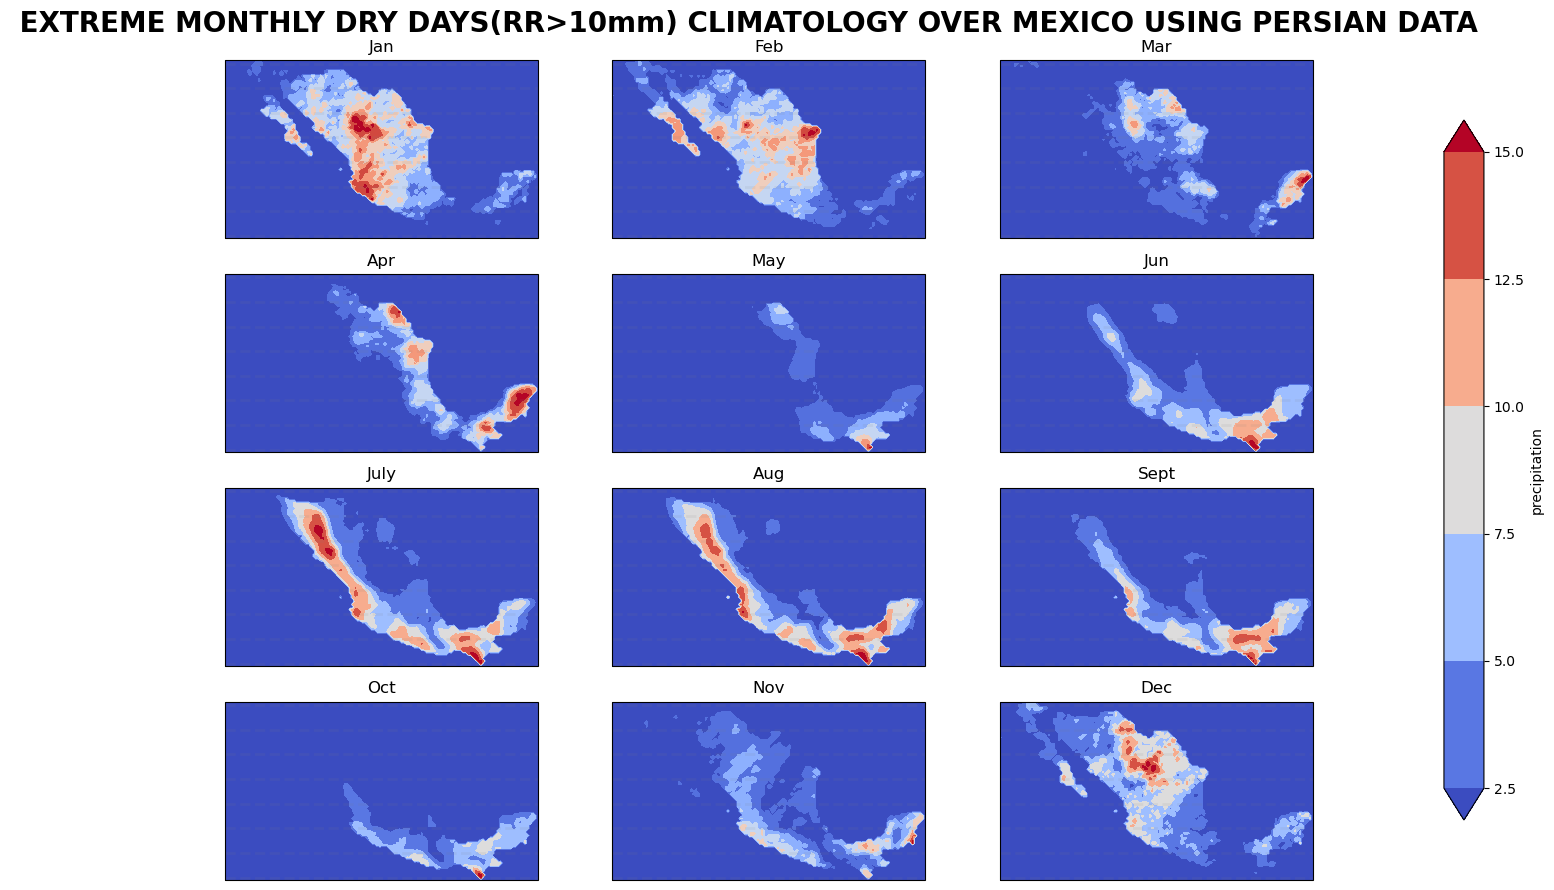

In [43]:
           #SPATIAL PLOTS FOR  EXTREME MONTHLY DRY  DAYS
fig, axes = plt.subplots(nrows=4, 
                       ncols=3, 
                       figsize=(20, 10),
                       subplot_kw={'projection':ccrs.PlateCarree()})
ax = axes.flatten()

month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']

for i, v in enumerate(ax):
    ax[i].add_feature(cfeature.LAKES)
    ax[i].set_extent((-118.5,-86.7,32.0,14.75))
    ax[i].set_title(month_names[i])
    cs=ax[i].contourf(extremme_10mm_monthly_dry_days['lon'],
                   extremme_10mm_monthly_dry_days['lat'], 
                   extremme_10mm_monthly_dry_days[i],
                   transform=ccrs.PlateCarree(),
                   cmap='coolwarm',extend='both')
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=2, color='gray', alpha=0.1, linestyle='--')
    gl.xlocator = mticker.FixedLocator(np.arange(-3.5, 1.4))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.xlabel_style = {'color': 'black'}
fig.subplots_adjust(wspace=-0.5, top=0.93)
cbar_ax = fig.add_axes([0.85, 0.17, 0.02, 0.7])
fig.suptitle(" EXTREME MONTHLY DRY DAYS(RR>10mm) CLIMATOLOGY OVER MEXICO USING PERSIAN DATA", fontweight='bold', fontsize=20);
cbar=fig.colorbar(cs, cax=cbar_ax, orientation='vertical' ,label='precipitation')

In [44]:
extremme_20mm_mexi = mexico_precip1
extremme_20mm_monthly_wet_days = (extremme_20mm_mexi > 20).groupby('datetime.month').sum(dim='datetime')
extremme_20mm_monthly_wet_days

<xarray.DataArray 'precip' (month: 12, lat: 74, lon: 129)>
dask.array<stack, shape=(12, 74, 129), dtype=int32, chunksize=(1, 74, 129), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -118.5 -118.2 -118.0 -117.8 ... -87.0 -86.75 -86.5
  * lat      (lat) float32 33.0 32.75 32.5 32.25 32.0 ... 15.5 15.25 15.0 14.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

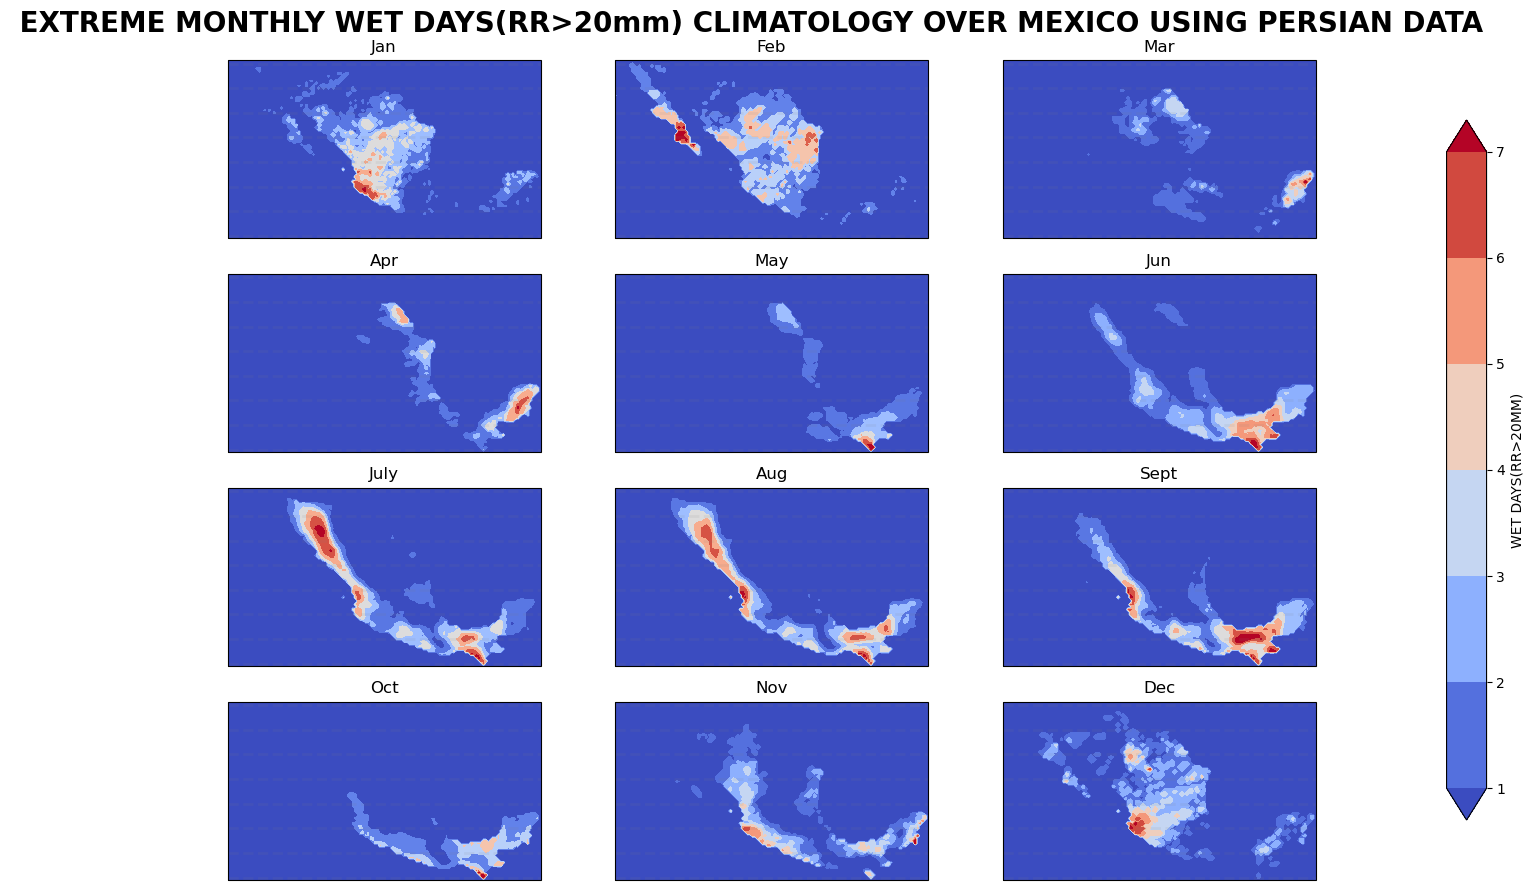

In [45]:
           #SPATIAL PLOTS FOR  EXTREMME MONTHLY DRY  DAYS
fig, axes = plt.subplots(nrows=4, 
                       ncols=3, 
                       figsize=(20, 10),
                       subplot_kw={'projection':ccrs.PlateCarree()})
ax = axes.flatten()

month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']

for i, v in enumerate(ax):
    ax[i].add_feature(cfeature.LAKES)
    ax[i].set_extent((-118.5,-86.7,32.0,14.75))
    ax[i].set_title(month_names[i])
    cs=ax[i].contourf(extremme_20mm_monthly_wet_days['lon'],
                   extremme_20mm_monthly_wet_days['lat'], 
                   extremme_20mm_monthly_wet_days[i],
                   transform=ccrs.PlateCarree(),
                   cmap='coolwarm',extend='both')
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=2, color='gray', alpha=0.1, linestyle='--')
    gl.xlocator = mticker.FixedLocator(np.arange(-3.5, 1.4))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.xlabel_style = {'color': 'black'}
fig.subplots_adjust(wspace=-0.5, top=0.93)
cbar_ax = fig.add_axes([0.85, 0.17, 0.02, 0.7])
fig.suptitle(" EXTREME MONTHLY WET DAYS(RR>20mm) CLIMATOLOGY OVER MEXICO USING PERSIAN DATA", fontweight='bold', fontsize=20);
cbar=fig.colorbar(cs, cax=cbar_ax, orientation='vertical' ,label='WET DAYS(RR>20MM)')

In [46]:
#NUMBER OF EXTREME DRY DAYS(RR>10mm) AND WET DAYS (RR>20mm) PER YEAR
extreme_annual_dry_days = (mexico_data['precip']> 10).resample(datetime='1Y').sum()
extreme_annual_dry_days=(mexico_data['precip']>20).resample(datetime='1Y').sum()

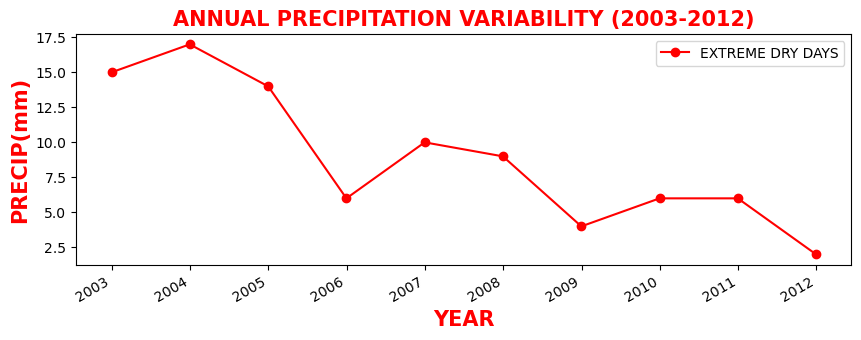

In [47]:
         #TIMESERIES FOR EXTREME DRY DAYS(RR>10mm) PER YEAR
extreme_annual_dry_days = (mexico_data['precip']> 10).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
extreme_annual_dry_days.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='EXTREME DRY DAYS')
ax.set_title('ANNUAL PRECIPITATION VARIABILITY (2003-2012)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

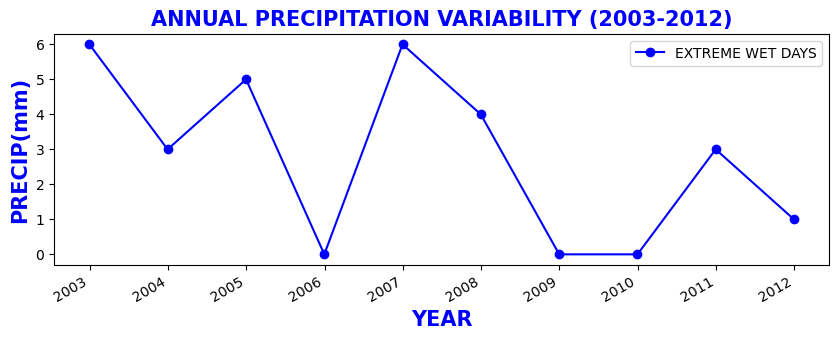

In [48]:
         #TIMESERIES FOR EXTREME WET DAYS(RR>20mm) PER YEAR
extreme_annual_wet_days = (mexico_data['precip']> 20).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
extreme_annual_wet_days.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='EXTREME WET DAYS')
ax.set_title('ANNUAL PRECIPITATION VARIABILITY (2003-2012)',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'blue')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'blue')
plt.legend()
plt.show()

In [49]:
# EXTREMME NUMBER OF DRY DAYS(RR>10mm) AND WET DAYS (RR>20mm) PER MONTH

wet_days = mexico_precip.where(mexico_precip > 20)
dry_days = mexico_precip.where(mexico_precip >10)

wet_days_per_month = wet_days.groupby('datetime.month').sum(dim='datetime')
dry_days_per_month = dry_days.groupby('datetime.month').sum(dim='datetime')

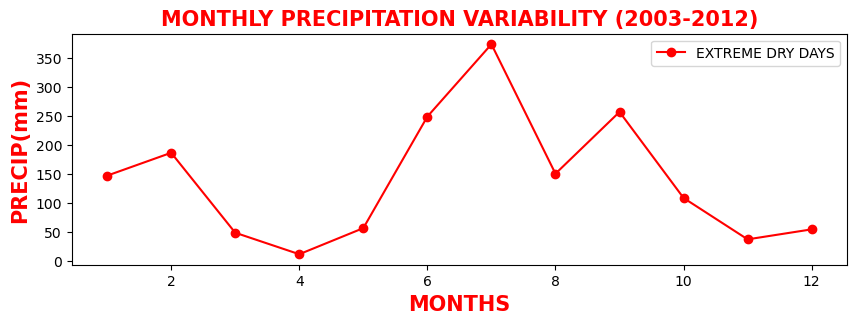

In [50]:
        #TIMESERIES FOR EXTREME DRY DAYS(RR>10mm) PER MONTH
dry_days_per_month = dry_days.groupby('datetime.month').sum(dim='datetime')
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
dry_days_per_month.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='EXTREME DRY DAYS')
ax.set_title('MONTHLY PRECIPITATION VARIABILITY (2003-2012)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('MONTHS', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

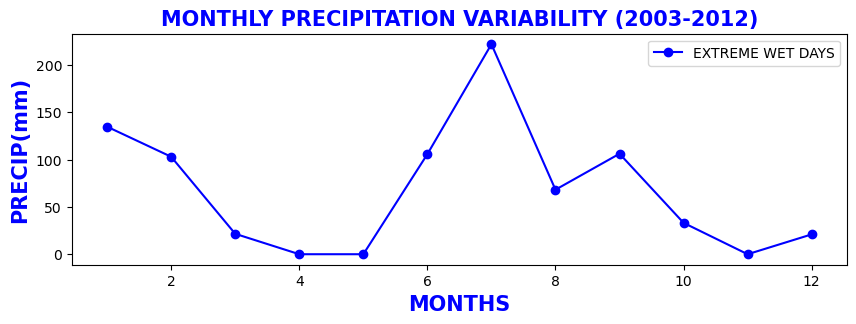

In [51]:
        #TIMESERIES FOR EXTREME WET DAYS(RR>20mm) PER MONTH
wet_days_per_month = wet_days.groupby('datetime.month').sum(dim='datetime')
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_per_month.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='EXTREME WET DAYS')
ax.set_title('MONTHLY PRECIPITATION VARIABILITY (2003-2012)',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('MONTHS', fontweight = 'bold', fontsize = 15,color = 'blue')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'blue')
plt.legend()
plt.show()